In [ ]:
import matplotlib.pyplot as plt 
import pickle
import numpy as np
import json

In [ ]:
with open('experiments/test-run/grp_data.json', 'r') as f:
    data=json.load(f)

fig,ax=plt.subplots()
ax.scatter(data['grp1'], data['grp0'], color='k')

x= np.linspace(1, 3, 100)
ax.plot(x, x, color='r')

In [ ]:
with open(f'experiments/test-run/data', 'rb') as f:
    data = pickle.load(f)
err = data['error_list_mean']
err.shape
n_repeat, n_iters, _ = err[:, 200:].shape
err = err[:, 200:]
fig,ax=plt.subplots()
ax.errorbar(range(n_iters), err.mean(axis=0)[:,0], yerr=err.std(axis=0)[:,0], label='OLS', color='red', ecolor='rosybrown')
ax.errorbar(range(n_iters), err.mean(axis=0)[:,1], yerr=err.std(axis=0)[:,1], label='TSLS', color='blue', ecolor='lightblue')
ax.errorbar(range(n_iters), err.mean(axis=0)[:,2], yerr=err.std(axis=0)[:,2], label='Ours', color='green', ecolor='lightgreen')

# plt.xlim(200)
ax.legend()
ax.set_xlabel('applicants / 2')
ax.set_ylabel('estimation error of theta star')

In [ ]:

round=1000
for round in (2,10, 100, 500, 1000):
    fig,ax=plt.subplots()

    # without selection data.
    with open(f'experiments/motivation-new/tsls-round{round}-admitall/data', 'rb') as f:
        data = pickle.load(f)
    err = data['error_list_mean']
    err.shape
    assert err.ndim == 3
    n_repeat, n_iters, _ = err.shape
    nr1 = n_repeat
    ax.errorbar(
        range(n_iters), err.mean(axis=0)[:,0], yerr=err.std(axis=0)[:,0], label='OLS w/o selection', color='red', ecolor='rosybrown'
    )
    ax.errorbar(
        range(n_iters), err.mean(axis=0)[:,1], yerr=err.std(axis=0)[:,1], label='TSLS w/o selection', color='green', ecolor='lightgreen'
    )

    # with selection data
    with open(f'experiments/motivation-new/tsls-round{round}-admitsome/data', 'rb') as f:
        data = pickle.load(f)
    err = data['error_list_mean']
    err.shape
    assert err.ndim == 3
    n_repeat, n_iters, _ = err.shape
    nr2 = n_repeat

    ax.errorbar(
        range(n_iters), err.mean(axis=0)[:,0], yerr=err.std(axis=0)[:,0], label='OLS w/ selection', color='orange', ecolor='wheat'
    )
    ax.errorbar(
        range(n_iters), err.mean(axis=0)[:,1], yerr=err.std(axis=0)[:,1], label='TSLS w/ selection', color='darkblue', ecolor='lightblue'
    )

    # common settings
    ax.set_ylim(-.1, .25)
    ax.legend()
    ax.grid()
    ax.axhline(y=0, color='k')

    ax.set_title(f'rounds = {round} using n_repeats = {nr1, nr2}')


In [ ]:
with open('experiments/20230426-090949/data', 'rb') as f:
    d1_w_select = pickle.load(f)
with open('experiments/20230426-090916/data', 'rb') as f:
    d1_wo_select = pickle.load(f)
    

In [ ]:
err_w_select = d1_w_select['error_list_mean']
err_wo_select = d1_wo_select['error_list_mean']

In [ ]:
err_w_select.shape, err_wo_select.shape 

In [ ]:
n_rounds = err_w_select.shape[1]
T = n_rounds * 2
fig,ax=plt.subplots()
ax.errorbar(
    range(2, T+1, 2), np.mean(err_w_select, axis=0)[:,0],
    yerr = np.std(err_w_select,axis=0)[:,0], label='OLS w/ selection', color='orange', ecolor='wheat'
)
ax.errorbar(
    range(2, T+1, 2), np.mean(err_w_select, axis=0)[:,1],
    yerr = np.std(err_w_select,axis=0)[:,0], label='2SLS w/ selection', color='darkblue', ecolor='lightblue'
)

ax.errorbar(
    range(2, T+1, 2), np.mean(err_wo_select, axis=0)[:,0],
    yerr = np.std(err_wo_select,axis=0)[:,0], label='OLS w/o selection', color='red', ecolor='rosybrown'
)
ax.errorbar(
    range(2, T+1, 2), np.mean(err_wo_select, axis=0)[:,1],
    yerr = np.std(err_wo_select,axis=0)[:,1], label='2SLS w/o selection', color='green', ecolor='lightgreen'
)
ax.legend()
ax.set_ylim(-.1, .25)
ax.set_xlim(right =T-11)
ax.grid()
ax.axhline(y=0, color='k')
ax.set_xlabel('students')
ax.set_ylabel(r'$|| \hat{\theta^*} - \theta^*|| $')
# ax.set_yscale('log')
plt.tight_layout()
plt.savefig('experiments/plot1.pdf')

In [ ]:
len([x for x in range(2, (n_rounds*2)+1, 2)])

In [ ]:
with open('experiments/20230426-090949/data', 'rb') as f:
    test= pickle.load(f)

test.keys()

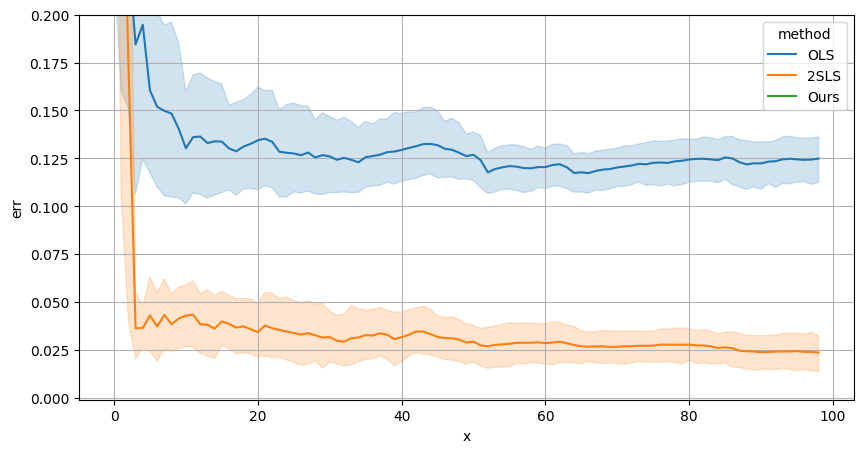

In [99]:
import seaborn as sns
import pandas as pd
import pickle
import numpy as np 
import matplotlib.pyplot as plt
def errmat2df(err):
    df_dict = {'x': [], 'err': [], 'method': []}

    # dataframe create
    for j in np.arange(err.shape[-1]):
        method_errs = err[:, :, j]
        assert method_errs.ndim == 2
        n_repeat, n_iters = method_errs.shape
        for i in range(n_repeat):
            method_x = np.arange(method_errs[i,:].size)
            df_dict['x'].extend(method_x.tolist())
            df_dict['err'].extend(method_errs[i,:].tolist())
            df_dict['method'].extend([j]*method_errs[i,:].size)
    df = pd.DataFrame(df_dict)
    df['method'] = df['method'].astype('category')
    df['method'] = df['method'].cat.rename_categories({0: 'OLS', 1:'2SLS', 2:'Ours'})
    return df


with open(f'experiments-new-theory/harris-with-selection-round100/data', 'rb') as f:
    data =pickle.load(f)
err = data['error_list_mean']
err = err[:, 0, :, :]
df = errmat2df(err)
fig,ax=plt.subplots(figsize=(10,5))
sns.lineplot(
    data=df, x='x', y='err', hue='method', errorbar=('ci', 95), ax=ax
)
ax.set_ylim(-0.001, 0.2)
ax.grid()

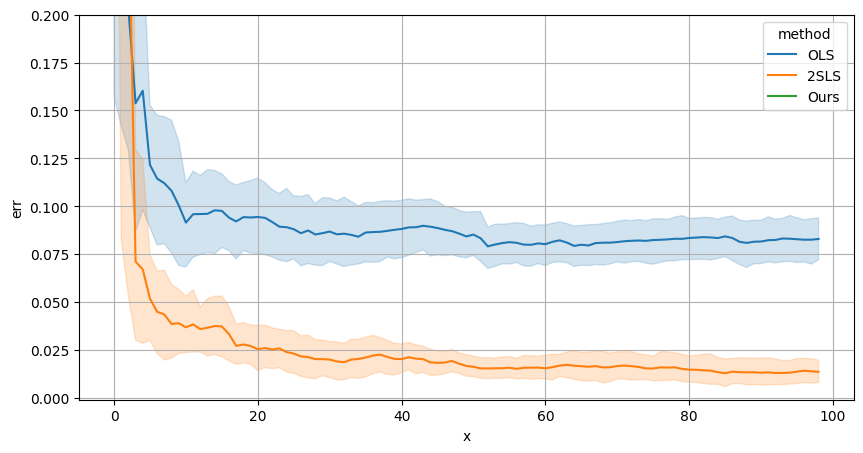

In [100]:
with open(f'experiments-new-theory/harris-with-selection-common-conversion-round100/data', 'rb') as f:
    data =pickle.load(f)
err = data['error_list_mean']
err = err[:, 0, :, :]
df = errmat2df(err)
fig,ax=plt.subplots(figsize=(10,5))
sns.lineplot(
    data=df, x='x', y='err', hue='method', errorbar=('ci', 95), ax=ax
)
ax.set_ylim(-0.001, 0.2)
ax.grid()

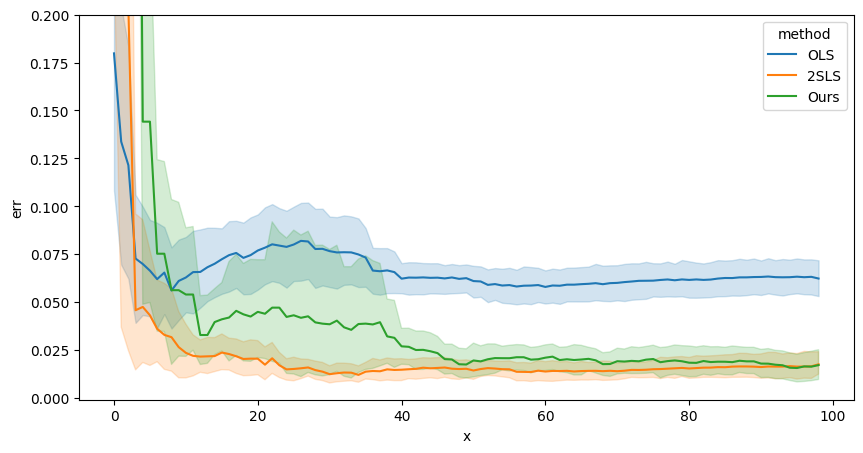

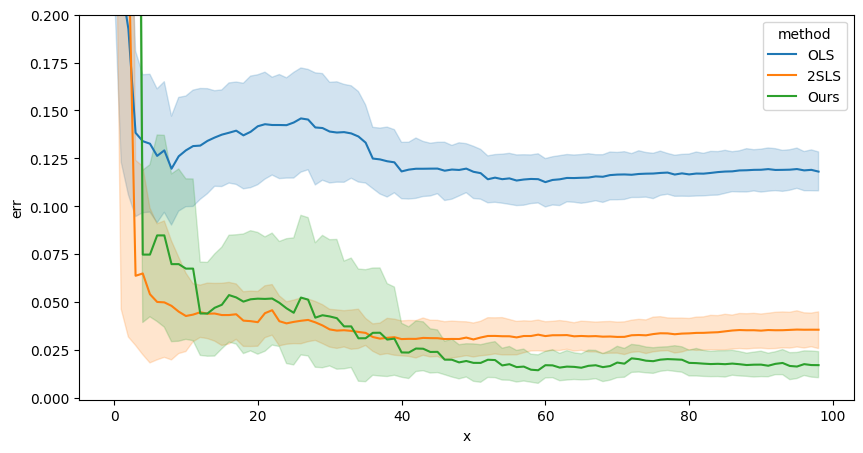

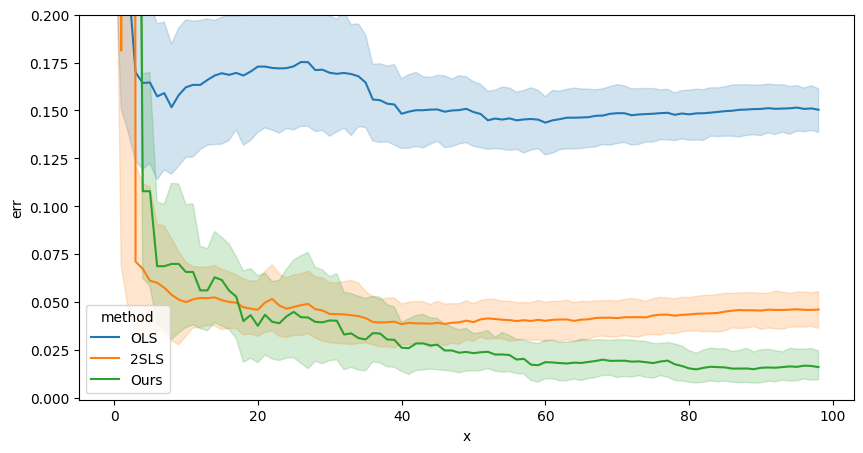

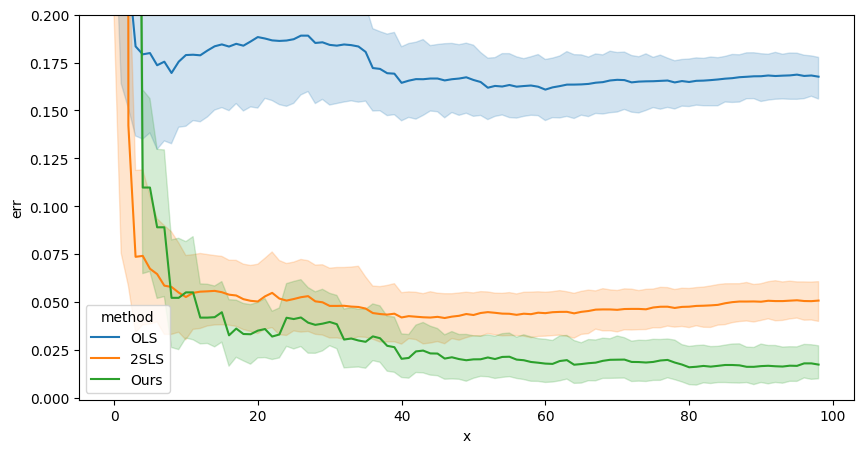

In [117]:
for bias in (1.25, 1.5, 1.75, 2):
    with open(f'experiments-new-theory/our-settings-bias{bias}/data', 'rb') as f:
        data =pickle.load(f)
    err = data['error_list_mean']
    err = err[:, 0, :, :]
    df = errmat2df(err)
    fig,ax=plt.subplots(figsize=(10,5))
    sns.lineplot(
        data=df, x='x', y='err', hue='method', errorbar=('ci', 95), ax=ax
    )
    ax.set_ylim(-0.001, 0.2)

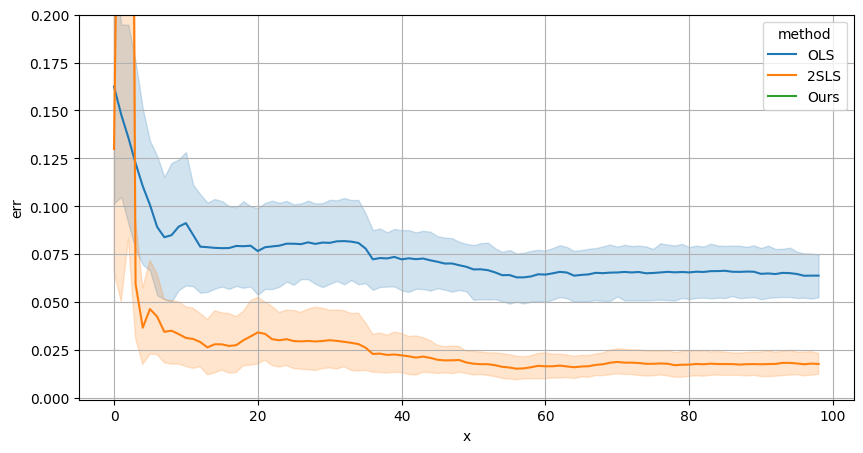

In [87]:
with open(f'experiments-new-theory/test-run/data', 'rb') as f:
    data =pickle.load(f)
err = data['error_list_mean']
err = err[:, 0, :, :]
df = errmat2df(err)
fig,ax=plt.subplots(figsize=(10,5))
sns.lineplot(
    data=df, x='x', y='err', hue='method', errorbar=('ci', 95), ax=ax
)
ax.set_ylim(-0.001, 0.2)
ax.grid()

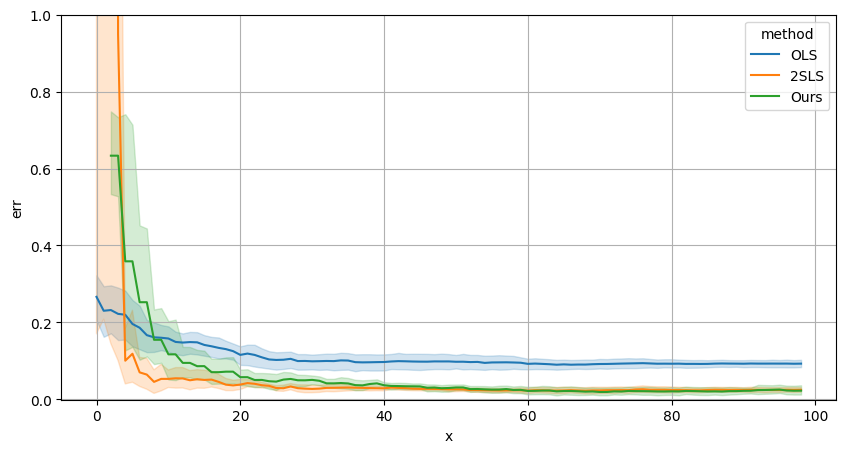

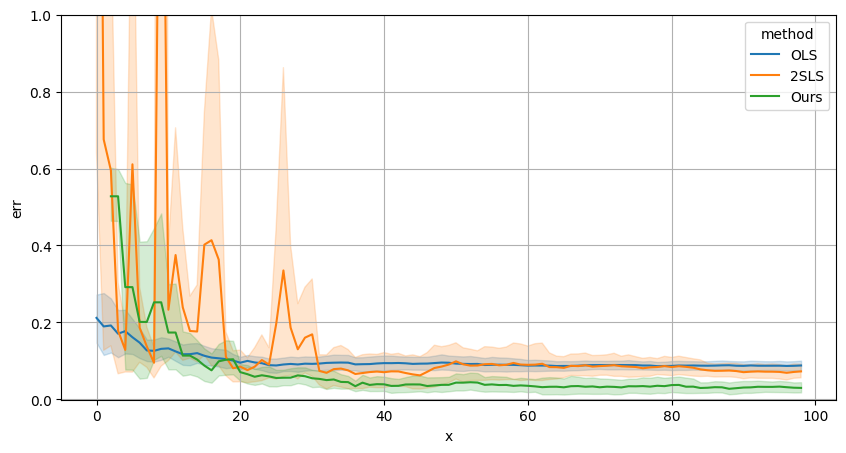

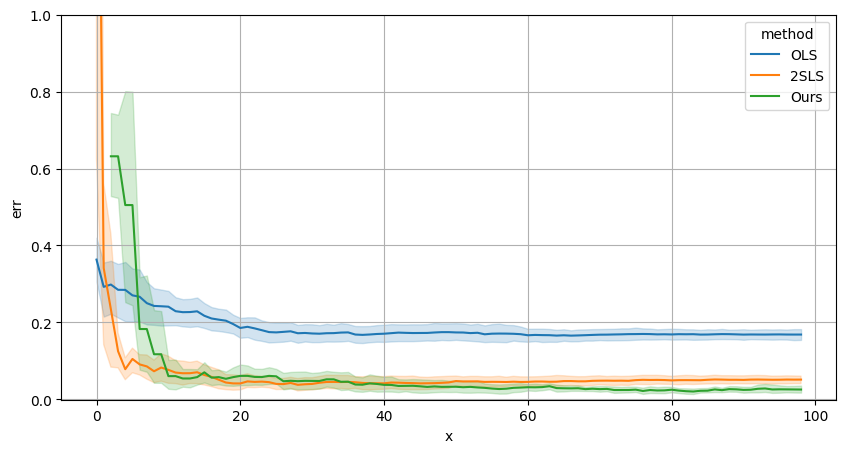

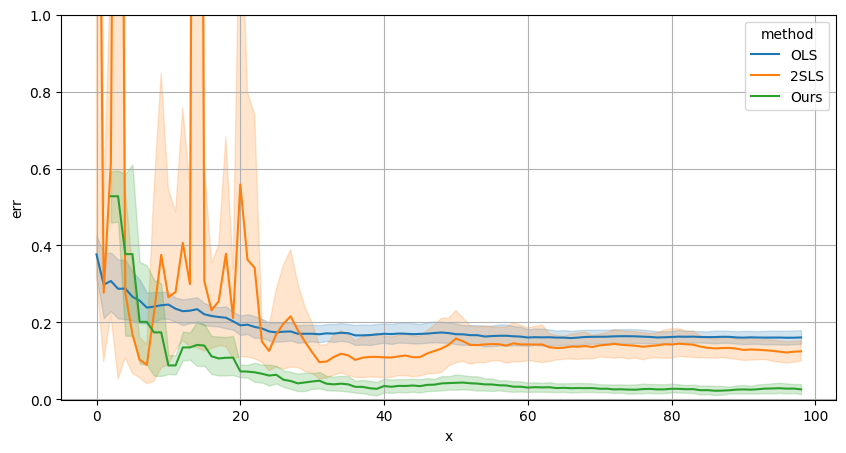

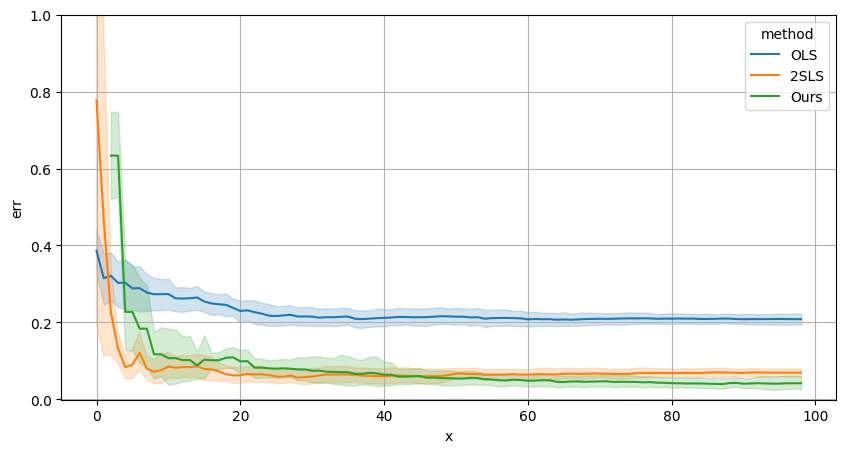

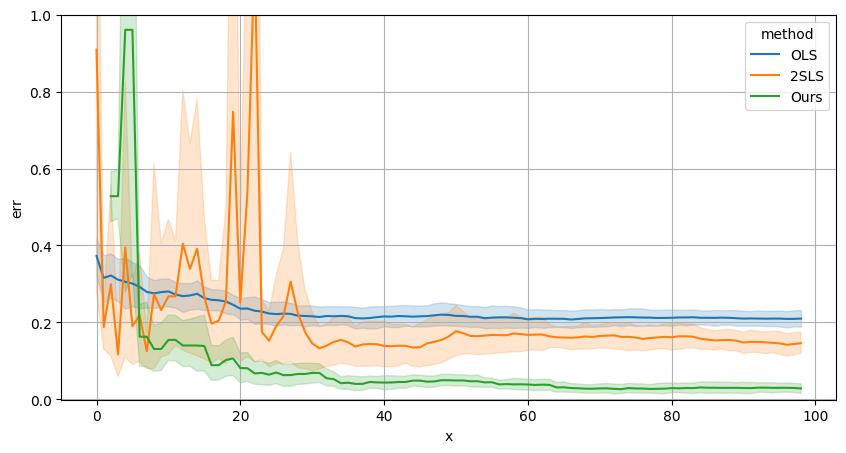

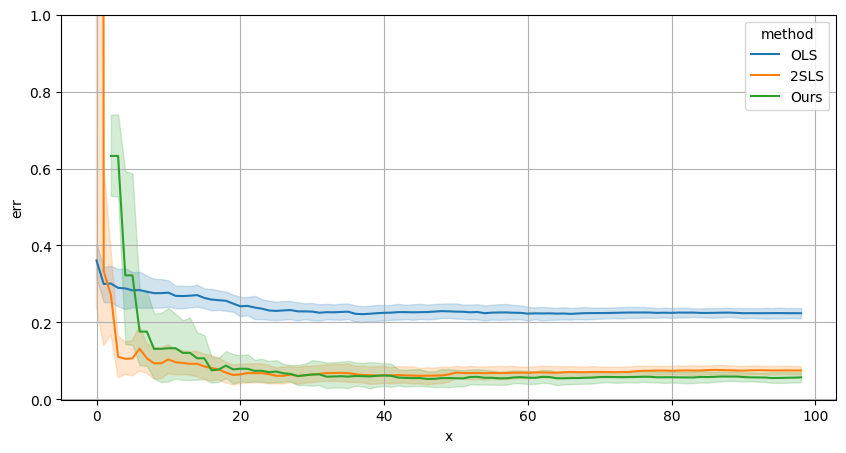

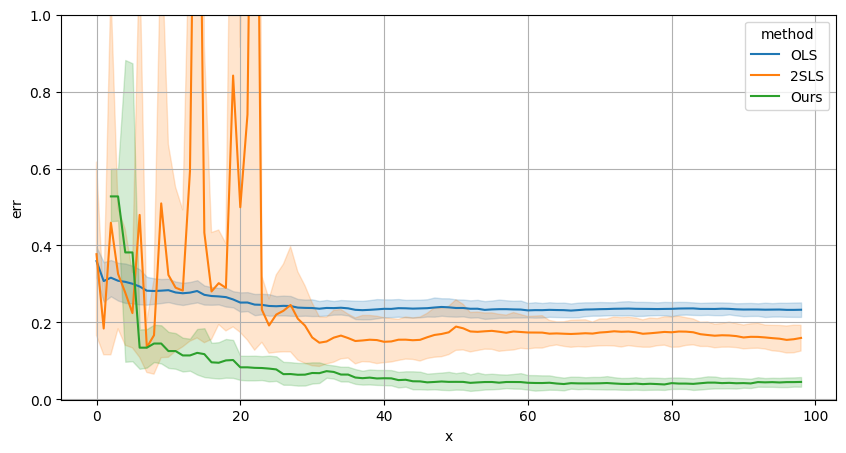

In [116]:
# multi-envs
for bias in (1.25, 1.5, 1.75, 2):
    with open(f'experiments-new-theory/our-settings-bias{bias}-multi/data', 'rb') as f:
        data =pickle.load(f)
    err = data['error_list_mean']
    n_envs = err.shape[1]
    for env_idx in range(n_envs):
        _err = err[:, env_idx, :, :]
        df = errmat2df(_err)
        fig,ax=plt.subplots(figsize=(10,5))
        sns.lineplot(
            data=df, x='x', y='err', hue='method', errorbar=('ci', 95), ax=ax
        )
        ax.set_ylim(-0.001, 1)
        ax.grid()

In [111]:
# validating number of envs.
num_envs = (1, 2, 4, 8)
with open(f'experiments-new-theory/our-settings-multi-numenvs1/data', 'rb') as f:
    data =pickle.load(f)
err_list = data['error_list_mean'].squeeze()

(10, 1, 1, 3)